In [1]:
import sys
import os
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import endf
import sigma

# Determine the directory where the notebook is being executed
notebook_dir = Path().resolve()

# Construct file paths relative to the notebook directory
project_path = notebook_dir.parent
reconstruction_path = project_path / 'recon'
data_path = project_path / 'data'

# Add the project and reconstruction directories to the Python path
if str(project_path) not in sys.path:
    sys.path.append(str(project_path))
if str(reconstruction_path) not in sys.path:
    sys.path.append(str(reconstruction_path))
if str(data_path) not in sys.path:
    sys.path.append(str(data_path))

# Determine the directory where the notebook is being executed
notebook_dir = Path().resolve()
project_path = notebook_dir.parent
data_path = project_path / 'data'

# Add the project and reconstruction directories to the Python path
if str(project_path) not in sys.path:
    sys.path.append(str(project_path))
if str(data_path) not in sys.path:
    sys.path.append(str(data_path))

In [30]:
mat.section_data[2, 151]['isotopes']

[{'ZAI': 8016.0,
  'ABN': 1.0,
  'LFW': 0,
  'NER': 1,
  'ranges': [{'EL': 1e-05,
    'EH': 6000000.0,
    'LRU': 0,
    'LRF': 0,
    'NRO': 0,
    'NAPS': 0,
    'SPI': 0.0,
    'AP': 0.415,
    'NLS': 0}]}]

In [23]:
file_path = data_path / 'dop-80160-0.0.pendf' 
mat = endf.Material(file_path)

legendre_data = {key : array for key, array in zip(mat.section_data[4, 2]['legendre']['E'], mat.section_data[4, 2]['legendre']['a_l'])}

tabulated_data = {}
energies = mat.section_data[4, 2]['tabulated']['E']
arrays = mat.section_data[4, 2]['tabulated']['mu']

for i, energy in enumerate(energies):
    mu_values = arrays[i].x
    f_values = arrays[i].y
    tabulated_data[energy] = list(zip(mu_values, f_values))


In [21]:
# mu = mat.section_data[4, 2]['tabulated']['mu']

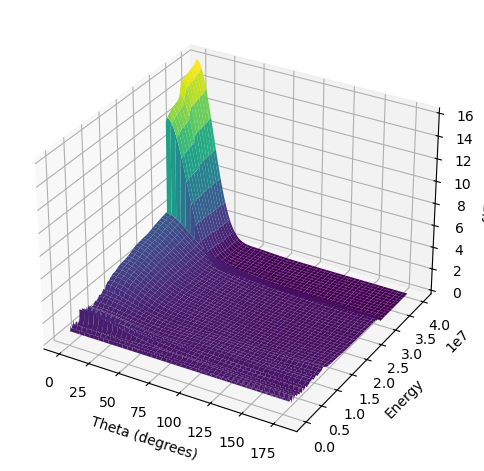

In [26]:
# Define the energy and mu ranges for the 3D plot
min_energy = 1e-5
max_energy = 4e7
num_points = 300
energy_values = np.linspace(min_energy, max_energy, num_points)
mu_values = np.linspace(-1, 1, num_points)
theta_values = np.linspace(0, 180, 180)

# Compute f(E, mu) for the 3D plot
f_values = np.zeros((num_points, len(theta_values)))
for i, energy in enumerate(energy_values):
    for j, theta in enumerate(theta_values):
    #for j, mu in enumerate(mu_values):
        mu = np.cos(np.radians(theta))
        try:
            f_values[i, j] = sigma.sigma_combined(mu, energy, legendre_data, tabulated_data, 3e7)  # Change LTT as needed
        except ValueError as e:
            print(f"Error for mu={mu}, energy={energy}: {e}")

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(theta_values, energy_values)
ax.plot_surface(X, Y, f_values, cmap='viridis')

plt.xlabel('Theta (degrees)')
ax.set_ylabel('Energy')
ax.set_zlabel('f(E, mu)')
plt.tight_layout()
plt.show()
